<a href="https://colab.research.google.com/github/mirada725/CommandPattern/blob/main/CNN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test=y_test.reshape(-1,)

In [13]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]   #define classes

In [17]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

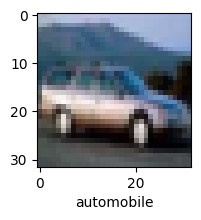

In [23]:
plot_sample(x_train,y_train,4)

In [22]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [24]:
#Normalize
x_train = x_train/255.0
x_test=x_test/255.0

In [25]:
x_train[:2]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [29]:
#create the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),    #first convolusion layer

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),    #first convolusion layer

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
cnn.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [32]:
cnn.fit(x_train,y_train,
        epochs=5,
        validation_data=(x_test,y_test),
        )

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3653 - loss: 1.7385 - val_accuracy: 0.5552 - val_loss: 1.2724
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.5679 - loss: 1.2255 - val_accuracy: 0.6114 - val_loss: 1.1122
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.6242 - loss: 1.0744 - val_accuracy: 0.6130 - val_loss: 1.0894
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6539 - loss: 0.9892 - val_accuracy: 0.6601 - val_loss: 0.9849
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.6813 - loss: 0.9194 - val_accuracy: 0.6612 - val_loss: 0.9814


In [33]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6631 - loss: 0.9719


[0.9813619256019592, 0.6611999869346619]

In [34]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[6.0258042e-03, 2.6912696e-03, 1.1045601e-03, 5.1060367e-01,
        5.3467290e-03, 1.8034227e-01, 1.0559345e-02, 2.1166798e-04,
        2.8113237e-01, 1.9823408e-03],
       [4.5288345e-03, 6.1927601e-03, 2.0999834e-05, 1.1773651e-05,
        4.1627205e-05, 2.9603032e-06, 2.2360025e-07, 3.7812387e-07,
        9.8850805e-01, 6.9241319e-04],
       [8.8577867e-02, 3.5936835e-01, 5.3563244e-03, 6.6793091e-03,
        1.7894780e-02, 2.9195577e-03, 7.9304719e-04, 4.8484085e-03,
        4.2862654e-01, 8.4935658e-02],
       [6.6375941e-01, 9.9518774e-03, 1.4524778e-02, 2.5638069e-03,
        9.3104281e-02, 2.5794047e-04, 1.6733553e-04, 4.9832731e-04,
        2.1474335e-01, 4.2888071e-04],
       [2.3480666e-04, 5.9708423e-04, 1.6834337e-02, 1.2544940e-01,
        6.4858979e-01, 5.0665099e-02, 1.5576713e-01, 1.9923782e-04,
        1.5814595e-03, 8.1621969e-05]], dtype=float32)

In [35]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]   #prediction

[3, 8, 8, 0, 4]

In [36]:
y_test[:5]    #test data set

array([3, 8, 8, 0, 6], dtype=uint8)

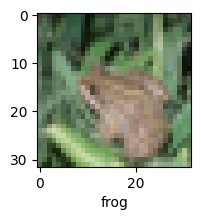

In [40]:
plot_sample(x_test,y_test,4)

In [41]:
classes[y_classes[4]]    #predicted class

'deer'